In [ ]:
pip install imdbpy

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pyplt
from sklearn.feature_extraction.text import CountVectorizer
from IMDBAPI import IMDB
from imdb import IMDb
imdb = IMDB()
ia = IMDb()
import matplotlib as plt
import nltk as nlt
from pandas import Series, DataFrame

# Calling data

In [9]:
Rawdata = pd.read_csv('movie_metadata.csv')
#this is the main data frame

# first lets analyse directors

In [10]:
films = Rawdata
films['revenue']=films['gross']-films['budget']
films

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,category,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,revenue
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,NaN
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,NaN
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,NaN
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,NaN


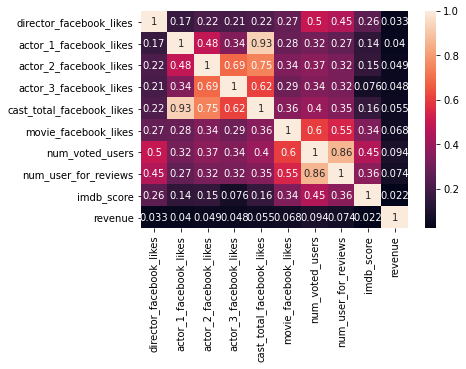

In [11]:
corrcol = ['director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','cast_total_facebook_likes','movie_facebook_likes','num_voted_users','num_user_for_reviews','imdb_score','revenue']
mvcorr = films[corrcol]
mvcorr = mvcorr[mvcorr.director_facebook_likes != 0]
mvcorr = mvcorr[mvcorr.actor_1_facebook_likes != 0]
mvcorr = mvcorr[mvcorr.actor_2_facebook_likes != 0]
mvcorr = mvcorr[mvcorr.cast_total_facebook_likes != 0]
mvcorr = mvcorr[mvcorr.movie_facebook_likes != 0]
correlation = mvcorr[corrcol].corr(method='pearson')
#correlation.to_csv('csv/correlation.csv',encoding='utf-8')
fig, axes = pyplt.subplots()
sns.heatmap(correlation, annot=True)
pyplt.show()
pyplt.close()

In [12]:
topdir = films.sort_values(by='director_facebook_likes', ascending=0)
topdir = topdir[['director_name','director_facebook_likes']]
topdir = topdir.drop_duplicates()[:50]
topdir = topdir.set_index('director_name')
topdir2 = films[['director_name','imdb_score']]
topdir2 = topdir2.groupby(['director_name']).mean()
topdir2 = topdir2.dropna()
topdir2 = topdir2.sort_values(by='imdb_score', ascending=0)[:50]
topdir3 = films[['director_name','revenue']]
topdir3 = topdir3.groupby(['director_name']).mean()
topdir3 = topdir3.dropna()
topdir3 = topdir3.sort_values(by='revenue', ascending=0)[:50]
topdir3.index
topdir4 = films[['director_name','num_critic_for_reviews']]
topdir4 = topdir4.groupby(['director_name']).mean()
topdir4 = topdir4.dropna()
topdir4 = topdir4.sort_values(by='num_critic_for_reviews', ascending=0)[:50]
topdir4.index

Index(['Benh Zeitlin', 'Drew Goddard', 'Joss Whedon', 'Tim Miller',
       'Michel Hazanavicius', 'Fede Alvarez', 'Steve McQueen',
       'Damien Chazelle', 'Dan Gilroy', 'David Robert Mitchell', 'Ben Affleck',
       'Christopher Nolan', 'J.J. Abrams', 'Alex Garland', 'Mark Andrews',
       'Gareth Evans', 'Alan Taylor', 'Marc Webb', 'Tomas Alfredson',
       'Colin Trevorrow', 'Lee Unkrich', 'Harmony Korine', 'Neill Blomkamp',
       'Zack Snyder', 'Joon-ho Bong', 'Robert Eggers', 'Lenny Abrahamson',
       'Rupert Sanders', 'Shane Black', 'Sam Mendes', 'George Nolfi',
       'Dan Trachtenberg', 'Chris Buck', 'Duncan Jones', 'Ethan Coen',
       'Robert Stromberg', 'Joe Cornish', 'Nicolas Winding Refn',
       'Pete Docter', 'Derek Cianfrance', 'Andrew Stanton',
       'Andrés Muschietti', 'Ethan Maniquis', 'Alfonso Cuarón',
       'Denis Villeneuve', 'Rian Johnson', 'Don Hall', 'Josh Trank',
       'Ryan Coogler', 'James Gunn'],
      dtype='object', name='director_name')

In [13]:
bestdir = topdir.index.intersection(topdir2.index)
bestdir = bestdir.intersection(topdir3.index)
bestdir = bestdir.intersection(topdir4.index)
bestdir

Index(['Christopher Nolan'], dtype='object', name='director_name')

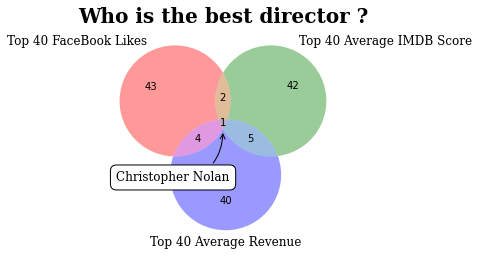

In [14]:
from matplotlib_venn import venn3, venn3_circles
set1 = set(topdir.index.values)
set2 = set(topdir2.index.values)
set3 = set(topdir3.index.values)
v = venn3([set1, set2, set3], ('Top 40 FaceBook Likes', 'Top 40 Average IMDB Score', 'Top 40 Average Revenue'))
pyplt.title("Who is the best director ?", fontsize=20,fontweight='bold',family='serif')
bestdirstr = ''.join(bestdir)
for text in v.set_labels:
    text.set_fontsize(12)
    text.set_family('serif')
pyplt.annotate(bestdirstr,fontsize=12,family='serif',xy=v.get_label_by_id('111').get_position()- np.array([0, 0.05]), xytext=(-50,-50),
             ha='center',textcoords='offset points',bbox=dict(boxstyle='round,pad=0.5',fc='white'),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='black'))
pyplt.show()

# now lets see which genre got more than 7 ratings

In [15]:
#prepare my data fram from cvs file and calling some colums which iam gonna to use later to graph the most high rate 

ratingdata = Rawdata[['category','movie_title','language','title_year','imdb_score','duration']]
ratingdata #print out  the frame 

,category,movie_title,language,title_year,imdb_score,duration
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,English,2009.0,7.9,178.0
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,English,2007.0,7.1,169.0
2,Action|Adventure|Thriller,Spectre,English,2015.0,6.8,148.0
3,Action|Thriller,The Dark Knight Rises,English,2012.0,8.5,164.0
4,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,7.1,NaN
...,...,...,...,...,...,...
5038,Comedy|Drama,Signed Sealed Delivered,English,2013.0,7.7,87.0
5039,Crime|Drama|Mystery|Thriller,The Following,English,NaN,7.5,43.0
5040,Drama|Horror|Thriller,A Plague So Pleasant,English,2013.0,6.3,76.0
5041,Comedy|Drama|Romance,Shanghai Calling,English,2012.0,6.3,100.0


In [16]:
#Splits the string in the Series/Index from the beginning, at the specified delimiter string
#Series.str.split(pat=None, n=- 1, expand=False)
#Split strings around given separator/delimiter.
s = ratingdata['category'].str.split('|').apply(Series, 1).stack() #stack=the prescribed level(s) from columns to index.
s.index = s.index.droplevel(-1) #droplevel(level, axis=0) ,Return DataFrame with requested index / column level(s) removed.
s.name = 'category'
del ratingdata['category']
df = ratingdata.join(s)#Join columns with other DataFrame either on index or on a key column.
df1 = df[df['imdb_score']>=8]#the score higher or equal 8
df1 #to print it 

,movie_title,language,title_year,imdb_score,duration,category
3,The Dark Knight Rises,English,2012.0,8.5,164.0,Action
3,The Dark Knight Rises,English,2012.0,8.5,164.0,Thriller
17,The Avengers,English,2012.0,8.1,173.0,Action
17,The Avengers,English,2012.0,8.1,173.0,Adventure
17,The Avengers,English,2012.0,8.1,173.0,Sci-Fi
...,...,...,...,...,...,...
4951,Night of the Living Dead,English,1968.0,8.0,96.0,Horror
4951,Night of the Living Dead,English,1968.0,8.0,96.0,Mystery
4972,"Peace, Propaganda & the Promised Land",English,2004.0,8.3,80.0,Documentary
5001,The Last Waltz,English,1978.0,8.2,117.0,Documentary


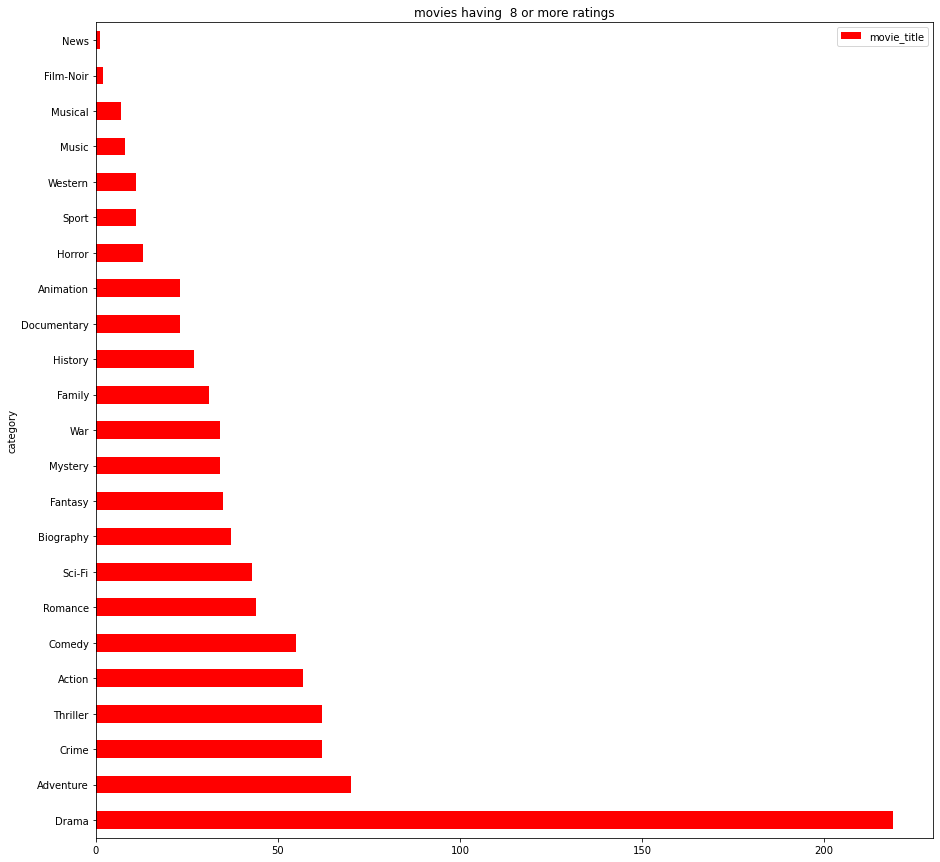

In [17]:
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
#Sort by the values along either axis.
#dataFrameGroupBy.nunique(dropna=True)
#Return DataFrame with counts of unique elements in each position.
#DataFrame.plot.barh(x=None, y=None, **kwargs)[source]
#Make a horizontal bar plot.

df2 = (pd.DataFrame(df1.groupby('category').movie_title.nunique())).sort_values('movie_title', ascending=False )
df2[['movie_title']].plot.barh(stacked=True, title = 'movies having  8 or more ratings',color='r', figsize=(15, 15));

# now lets analyse oscar winners


In [18]:
Oscar = pd.read_csv('Oscar.csv')

In [19]:
OscarRecent = Oscar[Oscar.year_film>=1990]
OscarRecent = OscarRecent[OscarRecent.winner==True]
OscarRecent = OscarRecent.dropna()
OscarRecent = OscarRecent.drop_duplicates(subset="film")
OscarRecent = OscarRecent[['year_film','ceremony','category','name','film']]
OscarRecent.index = np.arange(1,len(OscarRecent)+1)
OscarRecent

,year_film,ceremony,category,name,film
1,1990,63,ACTOR IN A LEADING ROLE,Jeremy Irons,Reversal of Fortune
2,1990,63,ACTOR IN A SUPPORTING ROLE,Joe Pesci,Good Fellas
3,1990,63,ACTRESS IN A LEADING ROLE,Kathy Bates,Misery
4,1990,63,ACTRESS IN A SUPPORTING ROLE,Whoopi Goldberg,Ghost
5,1990,63,ART DIRECTION,Art Direction: Richard Sylbert; Set Decorati...,Dick Tracy
...,...,...,...,...,...
429,2019,92,MAKEUP AND HAIRSTYLING,"Kazu Hiro, Anne Morgan and Vivian Baker",Bombshell
430,2019,92,MUSIC (Original Song),Music by Elton John; Lyric by Bernie Taupin,Rocketman
431,2019,92,SHORT FILM (Animated),Matthew A. Cherry and Karen Rupert Toliver,Hair Love
432,2019,92,SHORT FILM (Live Action),Marshall Curry,The Neighbors' Window


In [20]:
OscarRecentNames = OscarRecent[['film']]
OscarRecentNames

,film
1,Reversal of Fortune
2,Good Fellas
3,Misery
4,Ghost
5,Dick Tracy
...,...
429,Bombshell
430,Rocketman
431,Hair Love
432,The Neighbors' Window


In [199]:
test = []
for i in range(1,len(OscarRecentNames)+1):
    try:
        movie=ia.search_movie(OscarRecentNames.iloc[i]['film'])
        movie = movie[0].movieID
        test.insert(i,ia.get_movie(movie).data['runtimes'])
        
    except KeyError:
        continue
 
 # loop will take some time but still gave an error and came out out short of few results but no matter

IndexError: single positional indexer is out-of-bounds

In [200]:
times = DataFrame (test,columns=['Runtime'])
times.index = np.arange(1,len(times)+1)

In [202]:
times

,Runtime
1,146
2,107
3,127
4,105
5,181
...,...
423,109
424,121
425,7
426,21


In [21]:
times.to_csv(r'RuntimeNoIndex.csv', index = False) #saving the data so we dont have to re request them

NameError: name 'times' is not defined

In [22]:
lengthes = pd.read_csv('RuntimeNoIndex.csv')
lengthes.index = np.arange(1,len(lengthes)+1)
lengthes

,Runtime
1,146
2,107
3,127
4,105
5,181
...,...
423,109
424,121
425,7
426,21


In [24]:
Oscarvslen = OscarRecentNames.join(lengthes)

In [26]:
Oscarvslen = Oscarvslen.dropna()

In [27]:
Oscarvslen

,film,Runtime
1,Reversal of Fortune,146.0
2,Good Fellas,107.0
3,Misery,127.0
4,Ghost,105.0
5,Dick Tracy,181.0
...,...,...
423,1917,109.0
424,Little Women,121.0
425,Parasite,7.0
426,American Factory,21.0


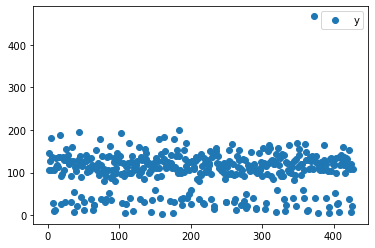

In [36]:
d = {"x":Oscarvslen['film'],"y":Oscarvslen['Runtime']}
df = pd.DataFrame(d)

df.plot(style=['o','rx'])


